In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('zomato.csv')


In [7]:
df.shape
df.columns
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
df.columns.tolist()


['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [11]:
columns_to_drop = ['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list']
existing_cols = [col for col in columns_to_drop if col in df.columns]
df.drop(existing_cols, axis=1, inplace=True)


In [13]:
df.isnull().sum()


name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [17]:
df['rate'] = df['rate'].fillna('Not Rated')
df['cuisines'] = df['cuisines'].fillna('Unknown')


In [21]:
# Remove 'Not Rated' and '-'
df = df[(df['rate'] != 'Not Rated') & (df['rate'] != '-')]

# Extract numeric part from 'rate'
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])

# Convert to float
df['rate'] = df['rate'].astype(float)


In [37]:
# Convert to string
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)

# Remove commas
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',', ''))

# Replace 'nan' strings with np.nan
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace('nan', np.nan)

# Convert to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)


In [41]:
# Replace missing values in 'votes' with 0 (without using inplace=True)
df['votes'] = df['votes'].fillna(0)

# Convert 'votes' to integers
df['votes'] = df['votes'].astype(int)



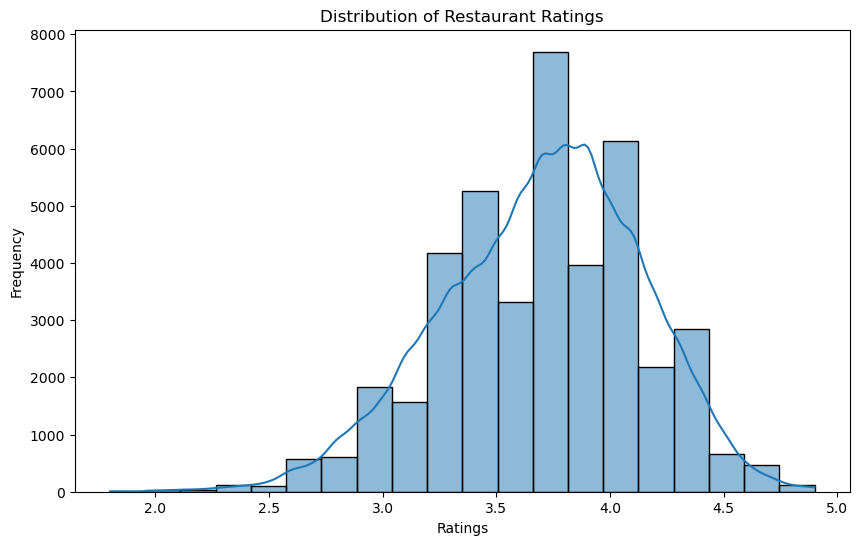

In [43]:
# Check the distribution of ratings
df['rate'].describe()

# Visualize the rating distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], kde=True, bins=20)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


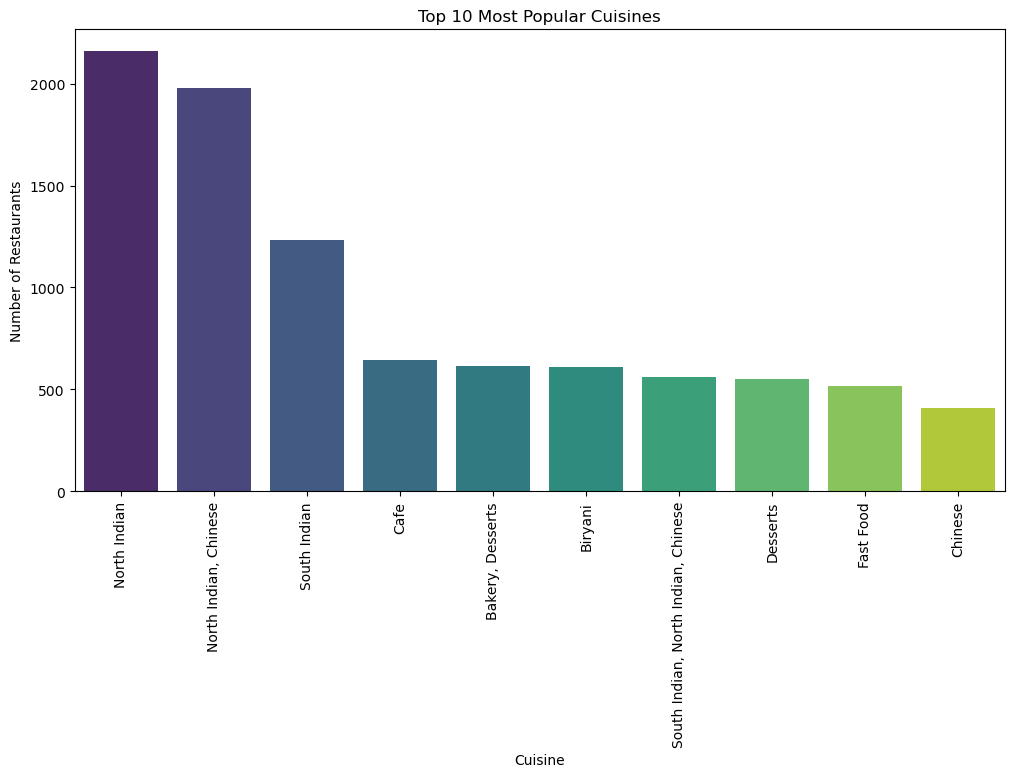

In [49]:
# Visualize the top 10 cuisines with hue (color differentiation)
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisines.index, y=cuisines.values, hue=cuisines.index, palette='viridis', legend=False)
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()


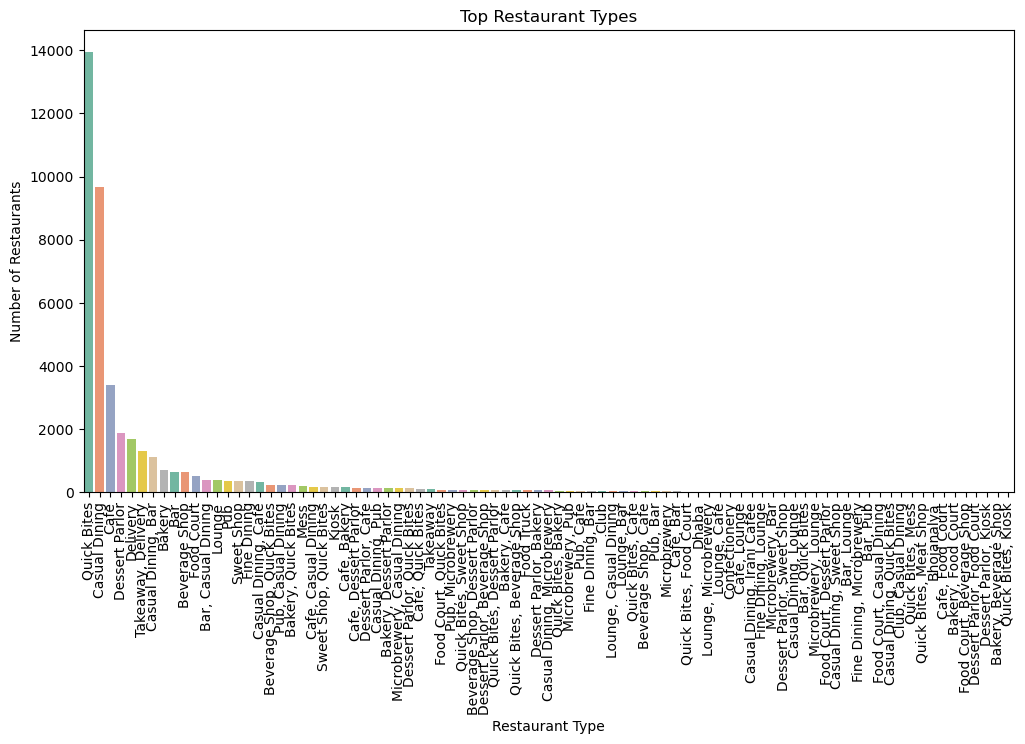

In [57]:
# Count the occurrences of each restaurant type
restaurant_types = df['rest_type'].value_counts()

# Plot the top restaurant types with 'hue' set to 'x'
plt.figure(figsize=(12, 6))
sns.barplot(x=restaurant_types.index, y=restaurant_types.values, palette='Set2', hue=restaurant_types.index)
plt.title('Top Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)  # Disable the legend
plt.show()



<Axes: xlabel='location'>

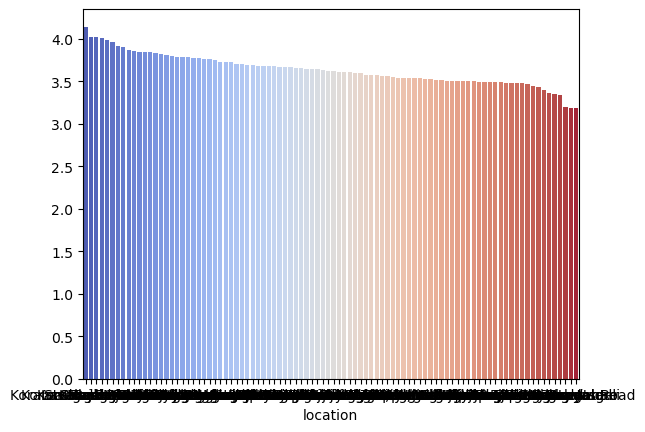

In [63]:
# Assuming location_ratings is a categorical variable, use it with 'hue'
sns.barplot(x=location_ratings.index, y=location_ratings.values, hue=location_ratings.index, palette='coolwarm')


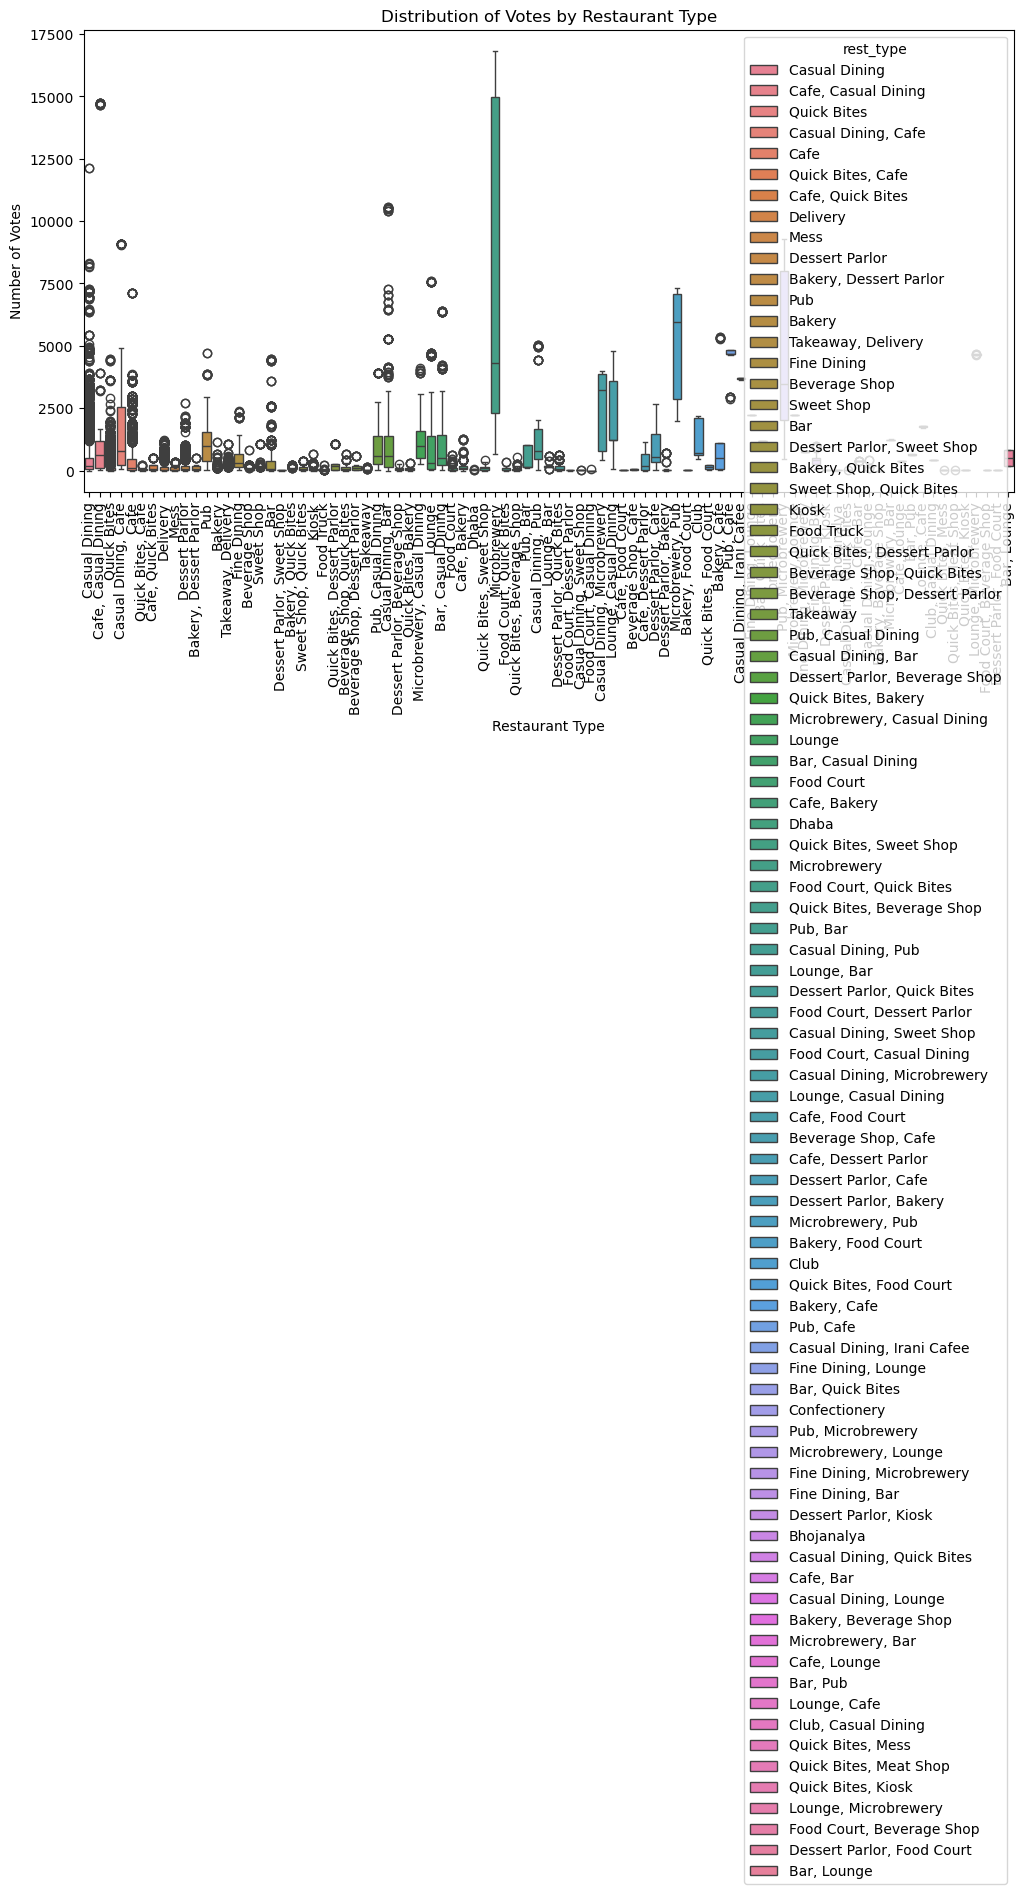

In [67]:
# Plotting the distribution of votes based on restaurant type with updated syntax
plt.figure(figsize=(12, 6))
sns.boxplot(x='rest_type', y='votes', data=df, hue='rest_type')  # Added hue to differentiate colors
plt.title('Distribution of Votes by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.show()


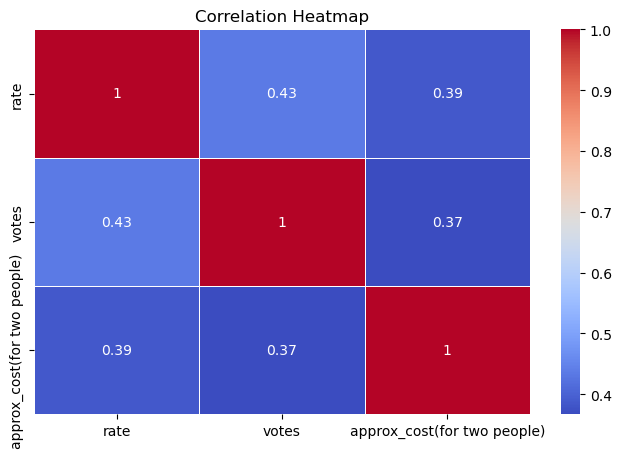

In [71]:
# Compute correlation matrix
corr = df[['rate', 'votes', 'approx_cost(for two people)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


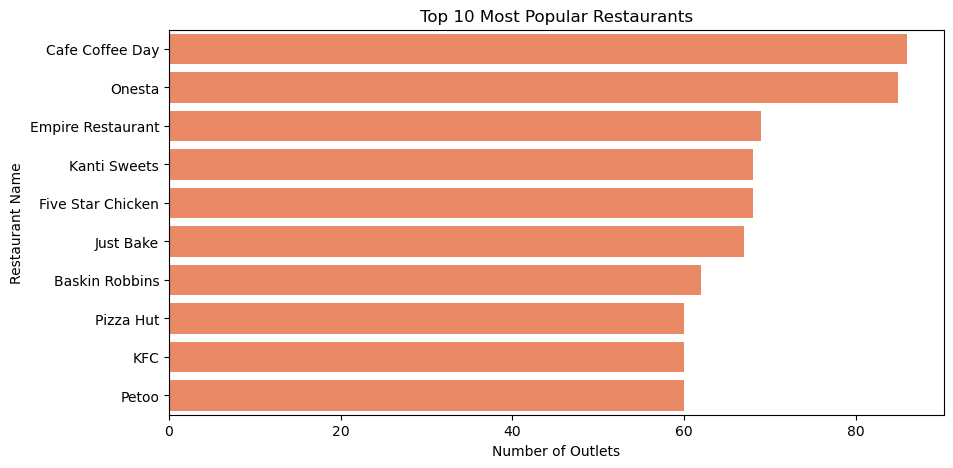

In [77]:
plt.figure(figsize=(10, 5))
sns.barplot(y=popular_restaurants.index, x=popular_restaurants.values, color='coral')
plt.title('Top 10 Most Popular Restaurants')
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Name')
plt.show()



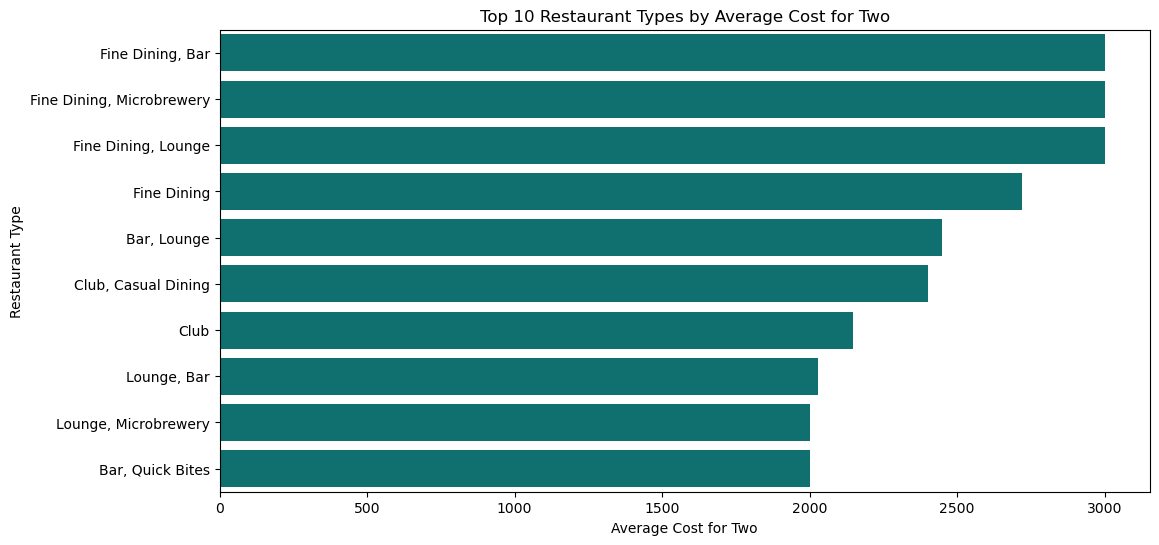

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x=rest_type_cost.values, y=rest_type_cost.index, color='teal')
plt.title('Top 10 Restaurant Types by Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Restaurant Type')
plt.show()




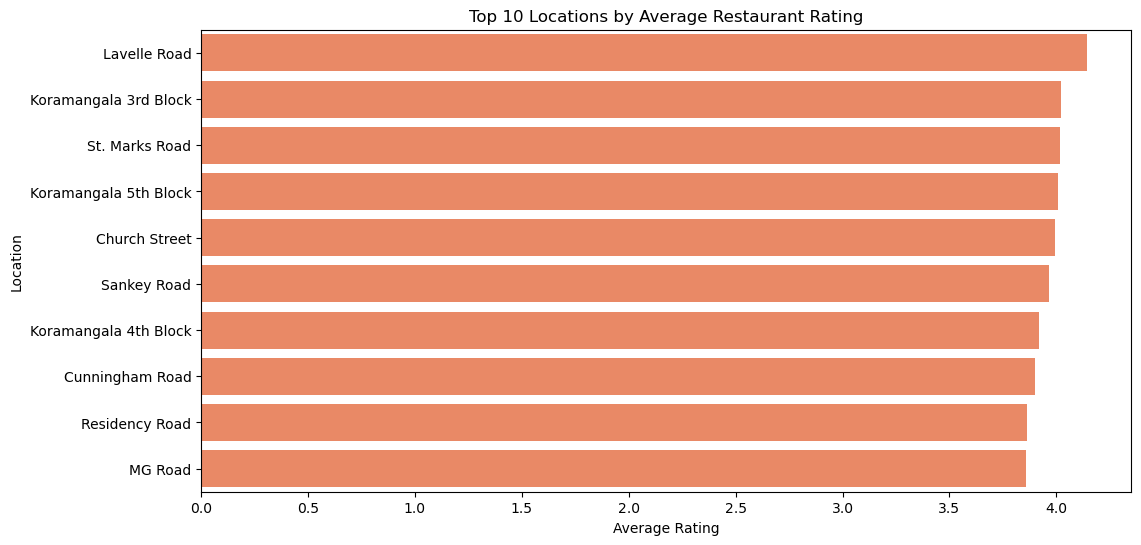

In [81]:
# Group by location and get average rating
location_rating = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=location_rating.values, y=location_rating.index, color='coral')
plt.title('Top 10 Locations by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()


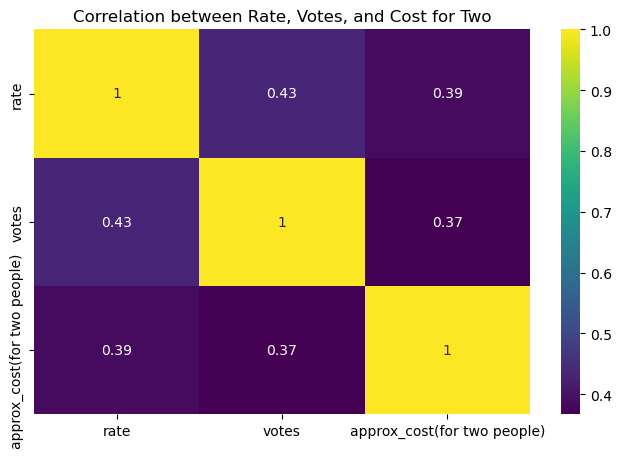

In [83]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['rate', 'votes', 'approx_cost(for two people)']].corr(), annot=True, cmap='viridis')
plt.title('Correlation between Rate, Votes, and Cost for Two')
plt.show()


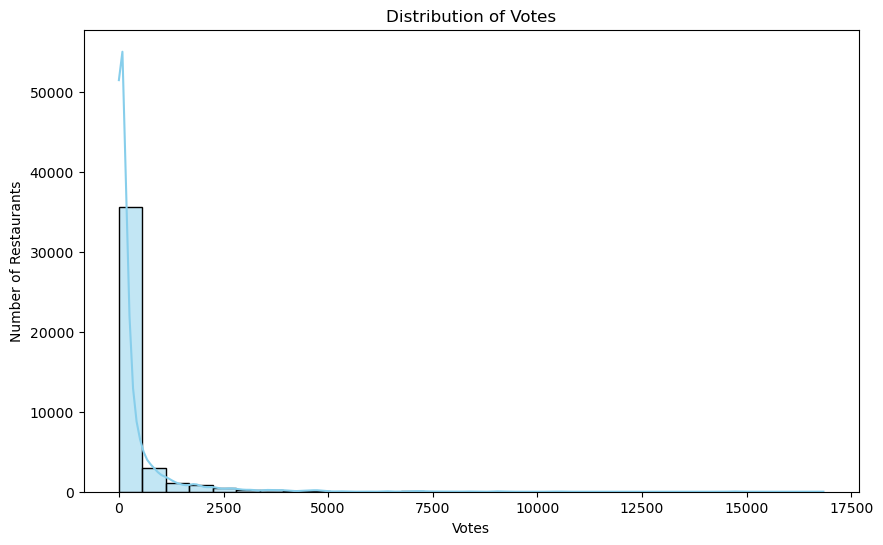

In [85]:
plt.figure(figsize=(10,6))
sns.histplot(df['votes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Number of Restaurants')
plt.show()


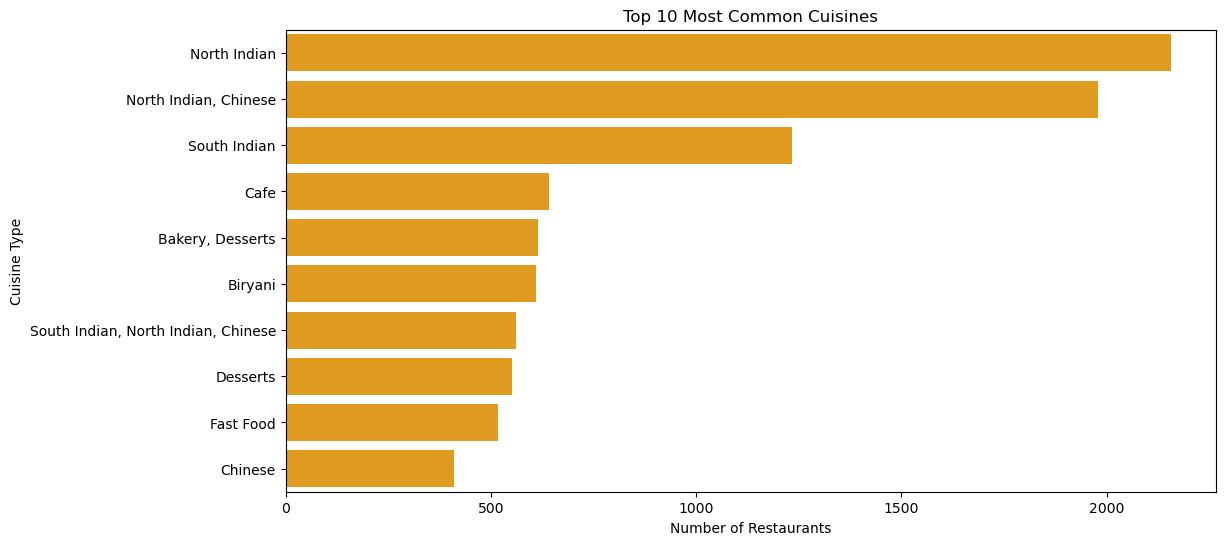

In [87]:
cuisines_count = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=cuisines_count.values, y=cuisines_count.index, color='orange')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.show()


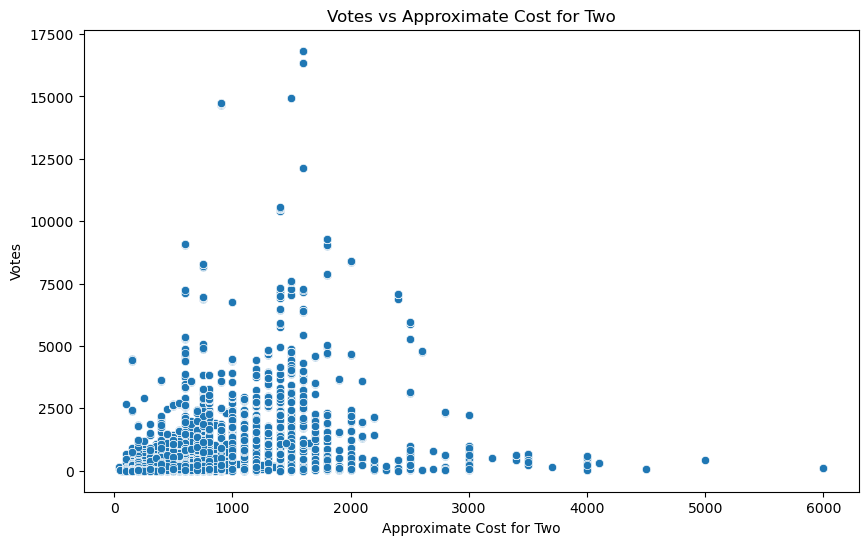

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='approx_cost(for two people)', y='votes', data=df)
plt.title('Votes vs Approximate Cost for Two')
plt.xlabel('Approximate Cost for Two')
plt.ylabel('Votes')
plt.show()


Conclusion:

Most restaurants have ratings between X and Y.

Restaurant type A tends to be costlier than others.

Location L1 has the highest average ratings.

Votes and cost have a weak/moderate correlation.

The most popular cuisine is C1.